In [38]:
# https://www.cs.toronto.edu/~kriz/cifar.html

In [39]:
from tensorflow.python.client import device_lib
for d in device_lib.list_local_devices():
    print(d.name, d.physical_device_desc)

/device:CPU:0 


In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras import optimizers
import tensorflow.keras.backend as K
from tensorflow.keras.utils import to_categorical
from keras.datasets import fashion_mnist, mnist, cifar100
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score

%matplotlib inline

In [41]:
(x_train, y_train), (x_test, y_test) = cifar100.load_data(label_mode='fine')

In [42]:
x_train.shape, y_train.shape

((50000, 32, 32, 3), (50000, 1))

In [43]:
x_train = x_train.astype('float32')
x_test  = x_test.astype('float32')
x_train /= 255
x_test /= 255
y_train = to_categorical(y_train, 100)
y_test = to_categorical(y_test, 100)

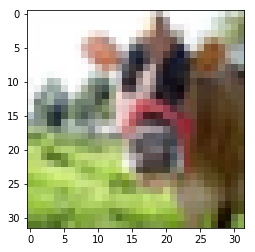

In [44]:
img = x_train[0]
plt.imshow(img);

In [45]:
input_shape = (32, 32, 3)

In [46]:
model = Sequential()

model.add(Conv2D(128, (3,3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(256, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(512, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=2))

model.add(Flatten())         
model.add(Dense(1024, activation='relu')) 
model.add(Dropout(0.2))                  
model.add(Dense(100, activation='softmax'))

opt = optimizers.Nadam()
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['categorical_accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 30, 30, 128)       3584      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 15, 15, 128)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 13, 13, 256)       295168    
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 6, 6, 256)         0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 4, 4, 512)         1180160   
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 2, 2, 512)         0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 2048)             

In [47]:
history = model.fit(x_train, y_train, epochs=10, batch_size=32, verbose=2, validation_split=0.3, shuffle=True)

Train on 35000 samples, validate on 15000 samples
Epoch 1/10
35000/35000 - 166s - loss: 3.9299 - categorical_accuracy: 0.0969 - val_loss: 3.4167 - val_categorical_accuracy: 0.1803
Epoch 2/10
35000/35000 - 155s - loss: 3.1741 - categorical_accuracy: 0.2231 - val_loss: 2.9949 - val_categorical_accuracy: 0.2687
Epoch 3/10
35000/35000 - 156s - loss: 2.7424 - categorical_accuracy: 0.3101 - val_loss: 2.7272 - val_categorical_accuracy: 0.3199
Epoch 4/10
35000/35000 - 158s - loss: 2.3988 - categorical_accuracy: 0.3769 - val_loss: 2.6271 - val_categorical_accuracy: 0.3464
Epoch 5/10
35000/35000 - 155s - loss: 2.0989 - categorical_accuracy: 0.4402 - val_loss: 2.5100 - val_categorical_accuracy: 0.3763
Epoch 6/10
35000/35000 - 158s - loss: 1.8115 - categorical_accuracy: 0.5071 - val_loss: 2.5314 - val_categorical_accuracy: 0.3815
Epoch 7/10
35000/35000 - 170s - loss: 1.5346 - categorical_accuracy: 0.5664 - val_loss: 2.6202 - val_categorical_accuracy: 0.3845
Epoch 8/10
35000/35000 - 162s - loss: 1.

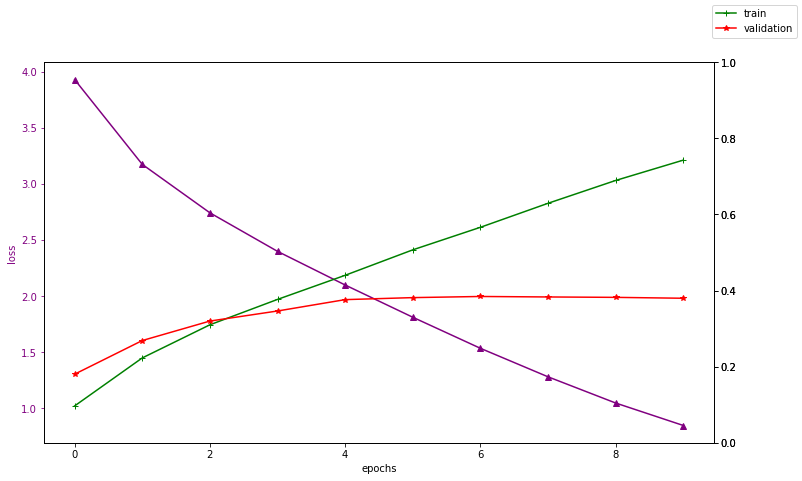

In [48]:
fig, ax1 = plt.subplots(1,1,figsize=(12,7))
ax1.plot(history.epoch, history.history['loss'], marker='^', color='purple')
ax1.set_xlabel('epochs')
ax1.set_ylabel('loss', color='purple')
ax1.tick_params('y', colors='purple')

ax2 = ax1.twinx()
plt.plot(history.epoch, history.history['categorical_accuracy'], marker='+', color='green', label='train')
ax2.set_ylim(0,1)

ax3 = ax1.twinx()
plt.plot(history.epoch, history.history['val_categorical_accuracy'], marker='*', color='red', label='validation')
ax3.set_ylim(0,1)

fig.legend();

In [49]:
model.evaluate(x_test, y_test)

10000/10000 [==============================] - 7s 747us/sample - loss: 3.0688 - categorical_accuracy: 0.3802


[3.0687968147277833, 0.3802]